In [29]:
import math
import numpy as np
np.sin(np.deg2rad(45))

0.7071067811865476

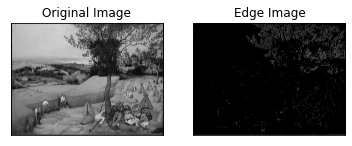

In [108]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('test_image.jpg',0)
edges = cv2.Canny(img,200,400)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

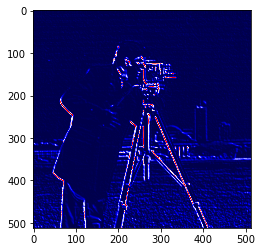

In [47]:
kernel = np.array([[0, -1, -1],
                   [1,  0, -1],
                   [1,  1,  0]])
plt.imshow(cv2.filter2D(image, cv2.CV_8U, kernel), cmap=plt.cm.seismic)

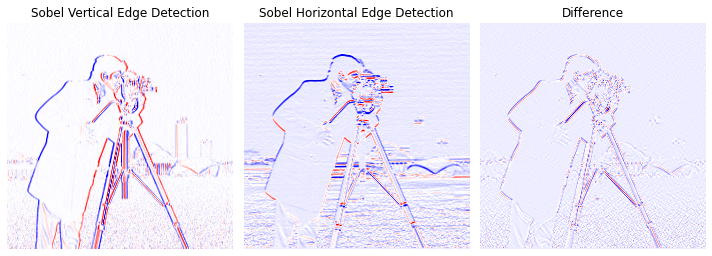

In [98]:
import numpy as np
import matplotlib.pyplot as plt
import math

from skimage import filters
from skimage.data import camera
from skimage.util import compare_images


image = camera()
edge_v = filters.sobel_v(image)
edge_h = filters.sobel_h(image)

fig, axes = plt.subplots(ncols=3, sharex=True, sharey=True,
                         figsize=(10,10))

axes[0].imshow(edge_v, cmap=plt.cm.seismic)
axes[0].set_title('Sobel Vertical Edge Detection')

axes[1].imshow(edge_h, cmap=plt.cm.seismic)
axes[1].set_title('Sobel Horizontal Edge Detection')

axes[2].imshow(np.diff(edge_h), cmap=plt.cm.seismic)
axes[2].set_title('Difference')

for ax in axes:
    ax.axis('off')

plt.tight_layout()
plt.show()

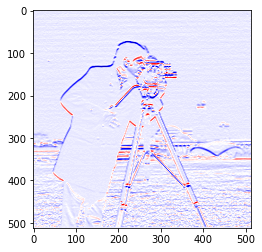

In [57]:
plt.imshow(np.sin(np.deg2rad(45))*filters.sobel_h(image), cmap=plt.cm.seismic)


In [73]:
np.mean(edge_v)

-0.00017284318512561284

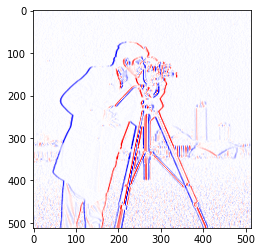

In [58]:
plt.imshow(np.sin(np.deg2rad(45))*filters.sobel_v(image), cmap=plt.cm.seismic)
